# Recreate earthquake plot

In [9]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt

eqk_url = 'https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv'

eqk = pd.read_csv(eqk_url)

fp = os.path.join('/', 'Users', 'hoyler', 'MEDS', 'EDS-220', 'eds220-2024-sections', 'data', 'countries', 'ne_110m_admin_0_countries.shp')

earth = gpd.read_file(fp)

In [2]:
os.getcwd()

'/Users/hoyler/MEDS/EDS-220/eds220-2024-sections'

In [3]:
earth.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
eqk.dtypes

time          object
latitude     float64
longitude    float64
depth        float64
mag          float64
id            object
place         object
type          object
dtype: object

In [5]:
# Create points from latitude and longitude
points = gpd.points_from_xy(eqk.longitude, 
                            eqk.latitude)

# Create geodataframe
eqk_geo = gpd.GeoDataFrame(eqk,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4326'  # Specify CRS
                                )

In [6]:
eqk_geo['geometry']

0         POINT (-152.70810 60.25200)
1         POINT (-115.13090 37.07030)
2         POINT (-149.25280 64.67170)
3         POINT (-148.95750 63.18870)
4         POINT (-115.69250 32.61683)
                     ...             
120103    POINT (-146.76290 60.96390)
120104    POINT (-154.41590 58.86910)
120105    POINT (-122.82584 38.84350)
120106    POINT (-148.99200 65.15210)
120107    POINT (-147.02450 60.22720)
Name: geometry, Length: 120108, dtype: geometry

In [7]:
eqk_geo = eqk_geo[(eqk_geo['mag'] >= 6.5) & (eqk_geo['type'] == 'earthquake')]

In [8]:
eqk_geo.head()

,time,latitude,longitude,depth,mag,id,place,type,geometry
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake,POINT (167.24900 -13.86330)
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake,POINT (-58.92720 14.66820)
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake,POINT (82.58640 35.90530)
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake,POINT (167.37210 -15.06910)
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake,POINT (-177.88060 -32.90760)


<Axes: title={'center': 'Earthquakes of magnitude at least 6.5 in 2014'}>

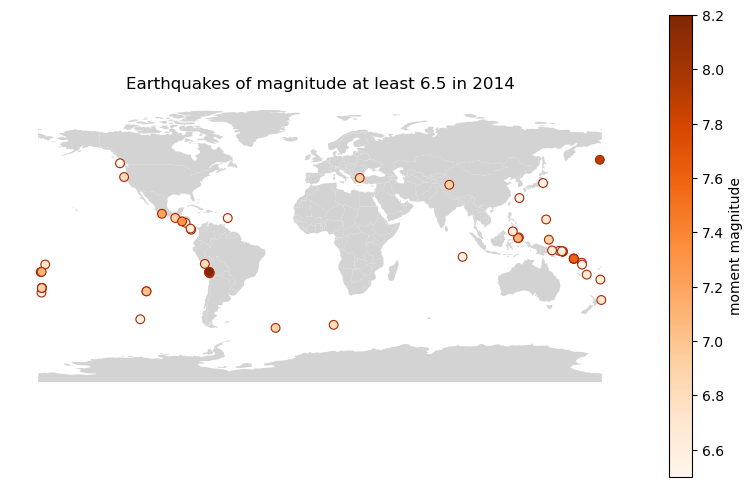

In [14]:
fig, ax = plt.subplots(figsize = (10,6))

ax.axis('off')
ax.set_title(label='Earthquakes of magnitude at least 6.5 in 2014',
            fontsize = 12)

# Add countries
earth.plot(ax=ax,
          color='#D3D3D3',
          edgecolor='none')

# Add earthquakes
eqk_geo.plot(ax=ax,
            column='mag',
            legend=True,
            edgecolors='#AA2704',
            markersize=40,
            cmap='Oranges',
            linewidth=0.8,
            legend_kwds={
                'label':'moment magnitude'
            })